In [3]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils 
from Query2Vec import Query2Vec
import matplotlib.pyplot as plt

In [2]:
class Data():
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __getitem__(self, i):
        return self.X[i], self.y[i]
    def __len__(self):
        return len(self.X)

In [9]:
tester = torch.load('parsed_workloads/queries_scale.pt')

In [10]:
tester.size()

torch.Size([500, 3, 19])

In [8]:
with open(os.path.join(os.getcwd(), 'learnedcardinalities/workloads/job-light.csv'), 'r') as f:
        job_light = f.read()
q_job_light = Query2Vec('learnedcardinalities/workloads/job-light.csv','learnedcardinalities/data/column_min_max_vals.csv',3)
queries_job_light, cardinalities_job_light = q_job_light.parse(job_light) 
queries_job_light = queries_job_light.reshape(queries_job_light.size(0), queries_job_light.size(2), queries_job_light.size(1)) 
torch.save(queries_job_light, 'parsed_workloads/queries_job_light.pt')
torch.save(cardinalities_job_light, 'parsed_workloads/cardinalities_job_light.pt')

with open(os.path.join(os.getcwd(), 'learnedcardinalities/workloads/scale.csv'), 'r') as f:
    scale = f.read()
q_scale = Query2Vec('learnedcardinalities/workloads/scale.csv','learnedcardinalities/data/column_min_max_vals.csv',3)
queries_scale, cardinalities_scale = q_scale.parse(scale)
queries_scale = queries_scale.reshape(queries_scale.size(0), queries_scale.size(2), queries_scale.size(1)) 
torch.save(queries_scale, 'parsed_workloads/queries_scale.pt')
torch.save(cardinalities_scale, 'parsed_workloads/cardinalities_scale.pt')


with open(os.path.join(os.getcwd(), 'learnedcardinalities/workloads/synthetic.csv'), 'r') as f:
    synth = f.read()
q_synth = Query2Vec('learnedcardinalities/workloads/synthetic.csv','learnedcardinalities/data/column_min_max_vals.csv',3)
queries_synth, cardinalities_synth = q_synth.parse(synth) 
queries_synth = queries_synth.reshape(queries_synth.size(0), queries_synth.size(2), queries_synth.size(1)) 
torch.save(queries_synth, 'parsed_workloads/queries_synthetic.pt')
torch.save(cardinalities_synth, 'parsed_workloads/cardinalities_synthetic.pt')

In [36]:
with open(os.path.join(os.getcwd(), 'learnedcardinalities/data/train.csv'), 'r') as f:
    data = f.read()

In [37]:
q = Query2Vec('learnedcardinalities/data/train.csv','learnedcardinalities/data/column_min_max_vals.csv',3)
queries, cardinalities = q.parse(data)

36244344


In [361]:
with open(os.path.join(os.getcwd(), 'learnedcardinalities/workloads/job-light.csv'), 'r') as f:
    job_light = f.read()
q_job_light = Query2Vec('learnedcardinalities/workloads/job-light.csv','learnedcardinalities/data/column_min_max_vals.csv',3)
queries_job_light, cardinalities_job_light = q_job_light.parse(job_light) 
queries_job_light = queries_job_light.reshape(queries_job_light.size(0), queries_job_light.size(2), queries_job_light.size(1)) 

36244344


In [362]:
with open(os.path.join(os.getcwd(), 'learnedcardinalities/workloads/scale.csv'), 'r') as f:
    scale = f.read()
q_scale = Query2Vec('learnedcardinalities/workloads/scale.csv','learnedcardinalities/data/column_min_max_vals.csv',3)
queries_scale, cardinalities_scale = q_scale.parse(scale)
queries_scale = queries_scale.reshape(queries_scale.size(0), queries_scale.size(2), queries_scale.size(1)) 

36244344


In [363]:
with open(os.path.join(os.getcwd(), 'learnedcardinalities/workloads/synthetic.csv'), 'r') as f:
    synth = f.read()
q_synth = Query2Vec('learnedcardinalities/workloads/synthetic.csv','learnedcardinalities/data/column_min_max_vals.csv',3)
queries_synth, cardinalities_synth = q_synth.parse(synth) 
queries_synth = queries_synth.reshape(queries_synth.size(0), queries_synth.size(2), queries_synth.size(1)) 

36244344


In [238]:
cards_train = cardinalities

In [39]:
qt = torch.load('2022_05_08_q2v.pt')
c = torch.load('2022_05_08_card.pt')
queries2 = qt.reshape(qt.size(0), qt.size(2), qt.size(1))

In [244]:
queries_train = queries.reshape(queries.size(0), queries.size(2), queries.size(1))

tr = Data(queries_train[:70000, :,:], cards_train[:70000])
va = Data(queries_train[70000:, :,:], cards_train[70000:])

queries_train_flat = queries_train.view(queries_train.size(0), queries_train.size(1)*queries_train.size(2))
tr_flat = Data(queries_train_flat[:70000, :], cards_train[:70000])
va_flat = Data(queries_train_flat[70000:, :], cards_train[70000:])

In [12]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.first_layer = nn.Linear(42, 32)
        self.hidden1 = nn.Linear(32, 16)
        self.hidden2 = nn.Linear(16,1)
        self.dropout = nn.Dropout(p=.2)
    def forward(self, x):
        a1 = F.relu(self.first_layer(x))
        a1 = self.dropout(a1)
        a2 = F.relu(self.hidden1(a1))
        a2 = self.dropout(a2)
        return F.relu(self.hidden2(a2))

In [13]:
# Basic CNN
class BaseCNN(nn.Module):
    def __init__(self, in_channels):
        super(BaseCNN, self).__init__()
        self.in_channels = in_channels

        self.c1 = nn.Conv1d(in_channels, 1,kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(1)
                   
        self.drop = nn.Dropout(p=.25)
        self.pred1 = nn.Linear(14, 16)
        self.final = nn.Linear(16, 1)
    def forward(self, x):
        a_c1 = self.drop(self.bn1(self.c1(x)))
        
        a1 = F.relu(self.pred1(a_c1))
        return F.relu(self.final(a1))

In [327]:
# Advanced CNN
class AdvCNN(nn.Module):
    def __init__(self, in_channels):
        super(AdvCNN, self).__init__()
        self.in_channels = in_channels

        self.c1 = nn.Conv1d(in_channels, in_channels*2,kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(in_channels*2)
        self.pool = nn.MaxPool1d(2)
        self.c2 = nn.Conv1d(in_channels*2, in_channels*2*2, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(in_channels*2*2)
                   
        self.drop = nn.Dropout(p=.25)
        self.pred1 = nn.Linear(36, 16)
        self.final = nn.Linear(16, 1)
    def forward(self, x):
        a_c1 = self.drop(self.pool(self.bn1(self.c1(x))))
        a_c2 = self.drop(self.pool(self.bn2(self.c2(a_c1))))
        flat = a_c2.view((a_c2.size(0), a_c2.size(1)*a_c2.size(2)))
        a1 = F.relu(self.pred1(flat))
        return F.relu(self.final(a1))

In [207]:
def qLoss(preds, targets):
    if preds.size() == torch.Size([1]):
        if preds == 0:
            return targets/1e-8
        elif targets == 0:
            return preds/1e-8
        elif preds > targets:
            return preds / targets
        else:
            return targets/preds
    else:        
        stacked = torch.transpose(torch.stack((preds, targets.reshape(preds.size())), 1).squeeze(),0,1)
        
        max = torch.max(stacked, 0)[0]
        min = torch.min(stacked, 0)[0]

        loss = []
        for i in range(len(max)):
            if min[i] == 0:
                loss.append(max[i]/1e-8)
            else:
                loss.append(max[i]/min[i])
        return torch.sum(torch.Tensor(loss))

In [218]:
# From Kipf
def qerror_loss(preds, targets):
    qerror = []
    for i in range(len(targets)):
        if (preds[i] > targets[i]).numpy()[0]:
            qerror.append(preds[i] / targets[i])
        else:
            qerror.append(targets[i] / preds[i])
    return torch.mean(torch.cat(qerror))
# End from Kipf

In [266]:
def train(model_type, in_feat, train, val, n_epochs, batch_size, learning_rate=3e-3, weight_decay=2e-3):
    if model_type=="mlp":
        model = MLP()
    elif model_type=="adv_cnn":
        model = AdvCNN(in_feat)
    elif model_type =="base_cnn":
        model = BaseCNN(in_feat)
    MODEL_PATH = "MODEL/" + model_type + "_bs_" + str(batch_size) + "_eta_" + str(learning_rate) + "_lambda_" + str(weight_decay) + ".pt"
    LOSS_PATH = "LOSS/" + model_type + "_bs_" + str(batch_size) + "_eta_" + str(learning_rate) + "_lambda_" + str(weight_decay) + ".pt"
    tr_load = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
    val_load = torch.utils.data.DataLoader(val, 1, shuffle=False)
    tr_losses = []
    val_losses = []
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    for e in range(n_epochs):
        ctr = 0
        loss_total = 0
        model.train()
        for features, targets in tr_load:

            ctr += len(features)
            preds = model(features)
            
            optimizer.zero_grad()
            
            # From Kipf
            loss = qerror_loss(preds, targets.float())
            loss_total += loss.item()
            # End from Kipf

            loss.backward()
            optimizer.step()
        tr_losses.append(loss_total / len(tr_load))

        model.eval()
        val_loss = 0
        for features, targets in val_load:
            preds = model(features)
            loss = qerror_loss(preds, targets.float())
            val_loss += loss.item()
        print(f'Epoch {e+1:0f} \t Loss {val_loss/val_load.__len__()}')
        val_losses.append(val_loss/len(val_load))
    losses_all = torch.Tensor((tr_losses, val_losses))
    TUNING_DIR = os.path.join(os.getcwd(), 'tuning')
    torch.save(model.state_dict(), os.path.join(TUNING_DIR ,MODEL_PATH))
    torch.save(losses_all, os.path.join(TUNING_DIR, LOSS_PATH))

    return tr_losses, val_losses        


In [290]:
def paramTuning(model_type,batch_sizes, etas, lambdas):
    for b in batch_sizes:
        for e in etas:
            for l in lambdas:
                if model_type=='mlp':
                    mod_loss = train("mlp", 3, tr_flat, va_flat, 25, b, e, l)
                else: 
                    mod_loss = train(model_type,3, tr, va, 25, b, e, l)
    return

In [291]:
paramTuning("mlp", [16, 32], [3e-4, 3e-3, 3e-2],[2e-3, 2e-2])

Epoch 1.000000 	 Loss 1104437.557266778
Epoch 2.000000 	 Loss 278073.9240407484
Epoch 3.000000 	 Loss 87225.00942595873
Epoch 4.000000 	 Loss 32574.642540665165
Epoch 5.000000 	 Loss 12892.070481926163
Epoch 6.000000 	 Loss 5451.810454805946
Epoch 7.000000 	 Loss 2429.4418424625756
Epoch 8.000000 	 Loss 1291.245341294984
Epoch 9.000000 	 Loss 883.040260719649
Epoch 10.000000 	 Loss 771.3033674769163
Epoch 11.000000 	 Loss 739.6493376880288
Epoch 12.000000 	 Loss 720.3105393331886
Epoch 13.000000 	 Loss 703.117152450943
Epoch 14.000000 	 Loss 687.2261197159052
Epoch 15.000000 	 Loss 672.1887207524935
Epoch 16.000000 	 Loss 657.5380380325794
Epoch 17.000000 	 Loss 642.7797900698106
Epoch 18.000000 	 Loss 627.9020349745035
Epoch 19.000000 	 Loss 612.8437935520689
Epoch 20.000000 	 Loss 597.5555439431309
Epoch 21.000000 	 Loss 580.8491915138245
Epoch 22.000000 	 Loss 563.7353362611691
Epoch 23.000000 	 Loss 546.6886297623436
Epoch 24.000000 	 Loss 531.1361799604733
Epoch 25.000000 	 Loss 5

In [292]:
paramTuning("base_cnn", [16, 32], [3e-4, 3e-3],[2e-3, 2e-2])

Epoch 1.000000 	 Loss 3330632.523082002
Epoch 2.000000 	 Loss 1694065.7116275926
Epoch 3.000000 	 Loss 740007.7495987733
Epoch 4.000000 	 Loss 271225.0212357903
Epoch 5.000000 	 Loss 115657.33674888281
Epoch 6.000000 	 Loss 58601.67957994523
Epoch 7.000000 	 Loss 31344.97309955971
Epoch 8.000000 	 Loss 18915.419217105613
Epoch 9.000000 	 Loss 11862.511063123615
Epoch 10.000000 	 Loss 6456.153014400136
Epoch 11.000000 	 Loss 3478.115045780639
Epoch 12.000000 	 Loss 1968.3996491917849
Epoch 13.000000 	 Loss 1298.157795018951
Epoch 14.000000 	 Loss 990.2678637996474
Epoch 15.000000 	 Loss 850.2874806239089
Epoch 16.000000 	 Loss 797.2565562689384
Epoch 17.000000 	 Loss 776.1001258511424
Epoch 18.000000 	 Loss 767.3638139535427
Epoch 19.000000 	 Loss 760.9623161485274
Epoch 20.000000 	 Loss 757.0930619434317
Epoch 21.000000 	 Loss 749.8629904797514
Epoch 22.000000 	 Loss 746.4635761410634
Epoch 23.000000 	 Loss 735.5745132018408
Epoch 24.000000 	 Loss 730.0538946007928
Epoch 25.000000 	 Lo

In [326]:
paramTuning("adv_cnn", [16, 32], [3e-4, 3e-3],[2e-3, 2e-2])

torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([16, 36])
torch.Size([1

KeyboardInterrupt: 

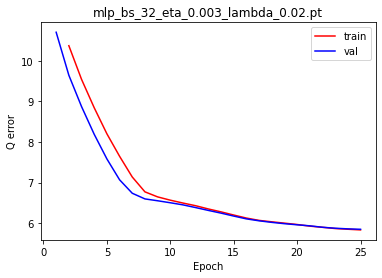

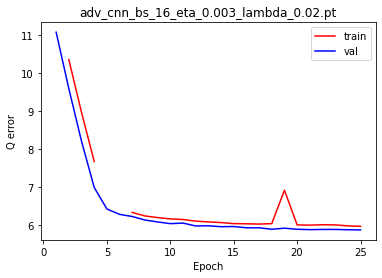

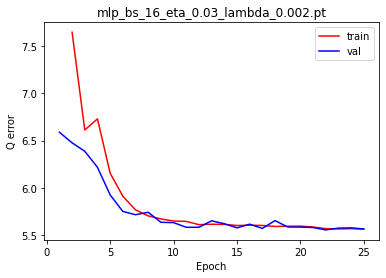

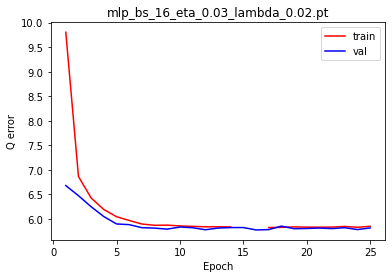

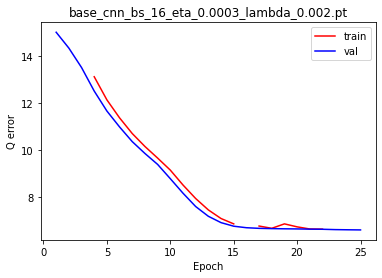

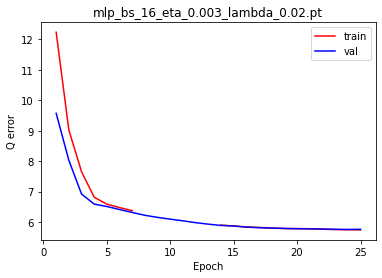

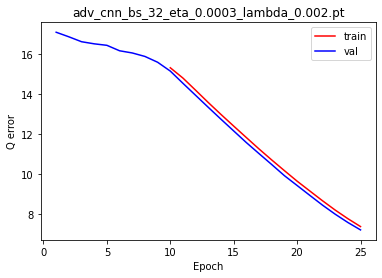

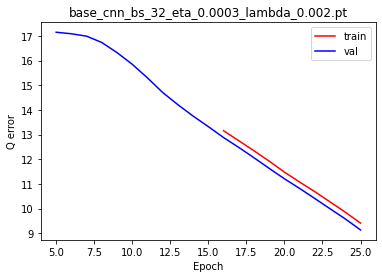

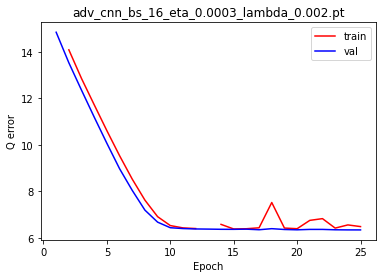

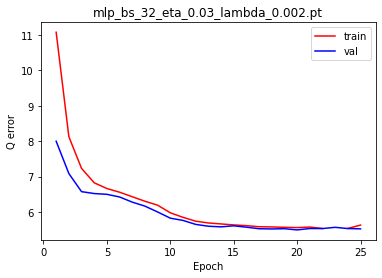

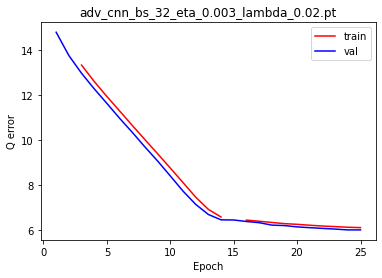

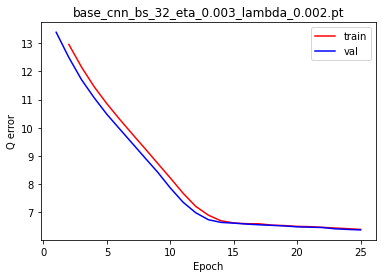

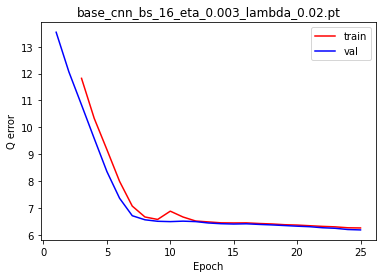

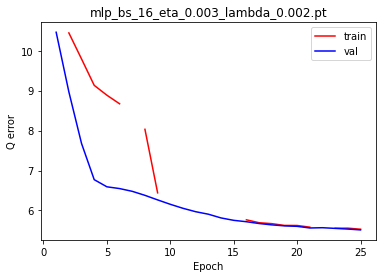

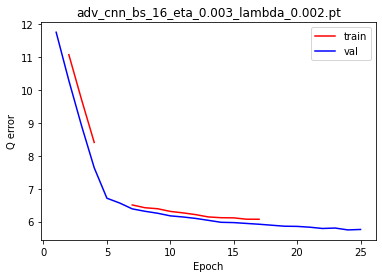

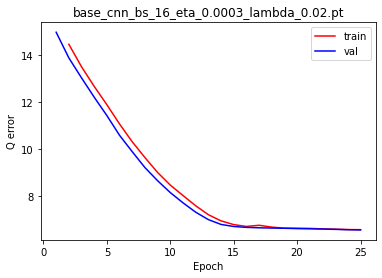

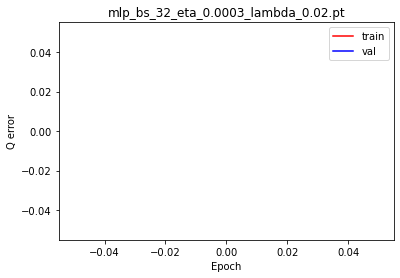

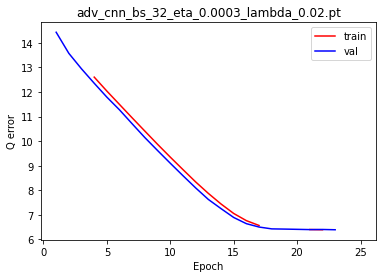

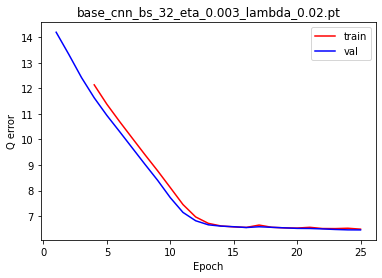

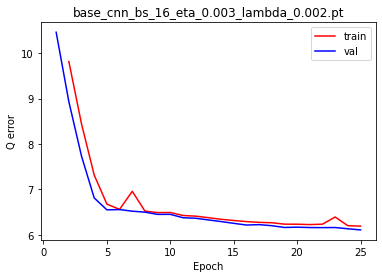

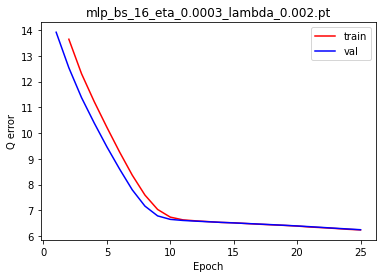

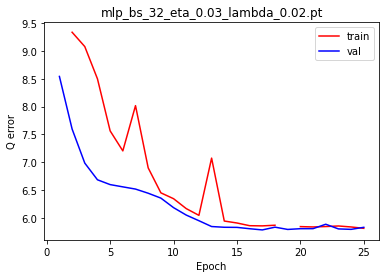

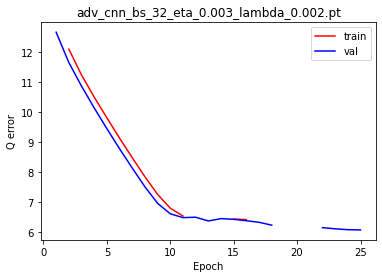

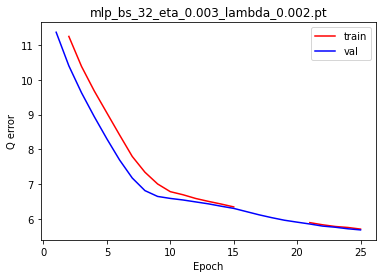

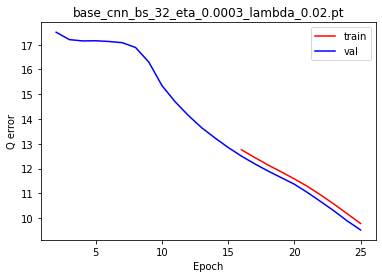

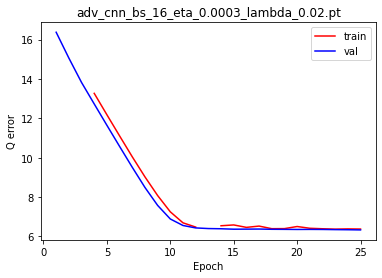

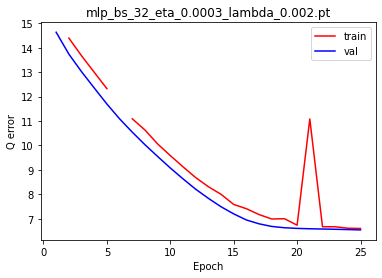

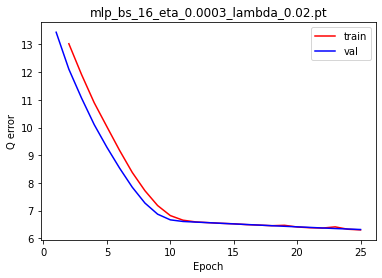

In [306]:
final_val_losses = []
for f in os.listdir('tuning/LOSS'):
    if not f == '.DS_Store':
        loss = torch.load(os.path.join('tuning/LOSS',f))
        tr_loss = loss[0]
        val_loss = loss[1]
        final_val_losses.append([f, val_loss[-1:]])
        plt.plot(np.arange(1,26), np.log(tr_loss.numpy()), color='r', label='train')
        plt.plot(np.arange(1,26), np.log(val_loss.numpy()), color='b', label='val')
        plt.title(f)
        plt.xlabel('Epoch')
        plt.ylabel('Q error')
        plt.legend(loc='upper right')
        plt.show()

In [307]:
np.array()

[['mlp_bs_32_eta_0.003_lambda_0.02.pt', tensor([346.4129])],
 ['adv_cnn_bs_16_eta_0.003_lambda_0.02.pt', tensor([357.3580])],
 ['mlp_bs_16_eta_0.03_lambda_0.002.pt', tensor([260.4343])],
 ['mlp_bs_16_eta_0.03_lambda_0.02.pt', tensor([336.4971])],
 ['base_cnn_bs_16_eta_0.0003_lambda_0.002.pt', tensor([725.8555])],
 ['mlp_bs_16_eta_0.003_lambda_0.02.pt', tensor([317.7996])],
 ['adv_cnn_bs_32_eta_0.0003_lambda_0.002.pt', tensor([1342.5479])],
 ['base_cnn_bs_32_eta_0.0003_lambda_0.002.pt', tensor([9256.0020])],
 ['adv_cnn_bs_16_eta_0.0003_lambda_0.002.pt', tensor([567.0804])],
 ['mlp_bs_32_eta_0.03_lambda_0.002.pt', tensor([250.6583])],
 ['adv_cnn_bs_32_eta_0.003_lambda_0.02.pt', tensor([409.4544])],
 ['base_cnn_bs_32_eta_0.003_lambda_0.002.pt', tensor([589.3182])],
 ['base_cnn_bs_16_eta_0.003_lambda_0.02.pt', tensor([486.4312])],
 ['mlp_bs_16_eta_0.003_lambda_0.002.pt', tensor([247.6919])],
 ['adv_cnn_bs_16_eta_0.003_lambda_0.002.pt', tensor([317.1114])],
 ['base_cnn_bs_16_eta_0.0003_lamb

In [308]:
len(cardinalities_job_light) + len(cardinalities_scale) +len(cardinalities_synth)

5570

In [328]:
ann_best = torch.load(os.path.join('tuning/MODEL', 'mlp_bs_16_eta_0.003_lambda_0.002.pt'))
bcnn_best = torch.load(os.path.join('tuning/MODEL', 'base_cnn_bs_16_eta_0.003_lambda_0.002.pt'))
acnn_best =torch.load(os.path.join('tuning/MODEL', 'adv_cnn_bs_16_eta_0.003_lambda_0.002.pt'))

In [329]:
ann_best

OrderedDict([('first_layer.weight',
              tensor([[-5.9513e+00, -1.1344e-40,  4.3088e-07,  ...,  4.7999e-02,
                        1.0766e-01,  1.1763e-05],
                      [-1.6665e+00, -5.2692e-41,  2.5790e-10,  ...,  2.4628e-02,
                        1.0522e-02, -5.5934e-11],
                      [-4.1783e+00,  9.5609e-41,  1.0080e-40,  ..., -7.1803e-02,
                       -8.2740e-02, -8.8574e-11],
                      ...,
                      [ 2.0891e-01, -8.6946e-41,  9.5007e-41,  ..., -3.8231e-03,
                       -8.3746e-03, -2.3975e-05],
                      [-2.1391e+00,  1.0065e-40,  1.1014e-42,  ..., -6.5453e-02,
                       -8.0590e-02,  6.4172e-11],
                      [-1.3646e+00, -1.6004e-08,  1.1036e-40,  ...,  2.5669e-41,
                        3.9357e-41, -5.6829e-11]])),
             ('first_layer.bias',
              tensor([-5.9614, -1.5639, -4.2073, -4.7082, -6.0075, -2.1953, -1.7410, -5.2083,
                    

In [337]:
ann = MLP()
ann.load_state_dict(ann_best)
ann.eval()

bCNN = BaseCNN(3)
bCNN.load_state_dict(bcnn_best)
bCNN.eval()

aCNN = AdvCNN(3)
aCNN.load_state_dict(acnn_best)
aCNN.eval()
models = [ann, bCNN, aCNN]

In [359]:
scale_flat = queries_scale[:, :14,:].reshape(queries_scale.size(0), 14 * 3) 


In [360]:
.reshape(queries.size(0), queries.size(2), queries.size(1))

torch.Size([500, 42])

In [364]:
ann_best = torch.load(os.path.join('tuning/MODEL', 'mlp_bs_16_eta_0.003_lambda_0.002.pt'))
bcnn_best = torch.load(os.path.join('tuning/MODEL', 'base_cnn_bs_16_eta_0.003_lambda_0.002.pt'))
acnn_best =torch.load(os.path.join('tuning/MODEL', 'adv_cnn_bs_16_eta_0.003_lambda_0.002.pt'))
def evalOnTest(model_type):
    if model_type == 'ann':
        ann_best = torch.load(os.path.join('tuning/MODEL', 'mlp_bs_16_eta_0.003_lambda_0.002.pt'))
        scale_flat = queries_scale[:, :,:14].reshape(queries_scale.size(0), 14 * 3) 
        synth_flat = queries_synth[:, :,:14].reshape(queries_synth.size(0), 14 * 3) 
        job_flat = queries_job_light[:, :,:14].reshape(queries_job_light.size(0), 14 * 3) 
        ann = MLP()
        ann.load_state_dict(ann_best)
        ann.eval()
        scale_preds =  ann(scale_flat)
        synth_preds = ann(synth_flat)
        job_preds = ann(job_flat)

        scale_loss = qerror_loss(scale_preds, cardinalities_scale)
        synth_loss = qerror_loss(synth_preds, cardinalities_synth)
        job_loss = qerror_loss(job_preds, cardinalities_job_light)
        
        print(f'{model_type} Q-error on scale: {scale_loss}')
        print(f'{model_type} Q-error on synth: {synth_loss}')
        print(f'{model_type} Q-error on JOB-Light: {job_loss}')
    elif model_type == 'bcnn':
        bcnn_best = torch.load(os.path.join('tuning/MODEL', 'base_cnn_bs_16_eta_0.003_lambda_0.002.pt'))
        bcnn = BaseCNN(3)
        bcnn.load_state_dict(bcnn_best)
        bcnn.eval()
        scale_preds =  bcnn(queries_scale[:,:,:14])
        synth_preds = bcnn(queries_synth[:,:,:14])
        job_preds = bcnn(queries_job_light[:,:,:14])

        scale_loss = qerror_loss(scale_preds, cardinalities_scale)
        synth_loss = qerror_loss(synth_preds, cardinalities_synth)
        job_loss = qerror_loss(job_preds, cardinalities_job_light)
        
        print(f'{model_type} Q-error on scale: {scale_loss}')
        print(f'{model_type} Q-error on synth: {synth_loss}')
        print(f'{model_type} Q-error on JOB-Light: {job_loss}')     
    elif model_type == 'acnn':
        acnn_best =torch.load(os.path.join('tuning/MODEL', 'adv_cnn_bs_16_eta_0.003_lambda_0.002.pt'))
        acnn = AdvCNN(3)
        acnn.load_state_dict(acnn_best)
        acnn.eval()
        scale_preds =  acnn(queries_scale[:,:,:14])
        synth_preds = acnn(queries_synth[:,:,:14])
        job_preds = acnn(queries_job_light[:,:,:14])

        scale_loss = qerror_loss(scale_preds, cardinalities_scale)
        synth_loss = qerror_loss(synth_preds, cardinalities_synth)
        job_loss = qerror_loss(job_preds, cardinalities_job_light)
        
        print(f'{model_type} Q-error on scale: {scale_loss}')
        print(f'{model_type} Q-error on synth: {synth_loss}')
        print(f'{model_type} Q-error on JOB-Light: {job_loss}')     
    else: 
        print('Dont recognize that model type')
        return -1   


    


In [365]:
evalOnTest('ann')
evalOnTest('bcnn')
evalOnTest('acnn')


ann Q-error on scale: 6116051.5
ann Q-error on synth: 241.1589813232422
ann Q-error on JOB-Light: 373358.5
bcnn Q-error on scale: 49057.93359375
bcnn Q-error on synth: 456.52398681640625
bcnn Q-error on JOB-Light: 10138.19140625
acnn Q-error on scale: 208432.078125
acnn Q-error on synth: 323.46356201171875
acnn Q-error on JOB-Light: 28744.33984375


In [370]:
queries_synth.size()

torch.Size([5000, 3, 14])